# **Installing Python Modules**

In [1]:
pip install np_utils

     |████████████████████████████████| 61 kB 5.6 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=e630f485851bc718a9d8d5e7b2cc554f080e9584d7db532a1a599ef9d1dc941c
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [2]:
# essential tools
import pandas as pd
import numpy as np
import io
import os
import sys
import pickle
from datetime import datetime
import time
import copy
import random

# Stats
from scipy import stats
from scipy.stats import skew, norm, kurtosis
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, balanced_accuracy_score, log_loss
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import homogeneity_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, LeakyReLU
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.python.keras import regularizers

import keras
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.layers.advanced_activations import PReLU

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

import seaborn as sns
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# allow muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# display more rows and columns
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 999
display.max_seq_items = None

from IPython.display import display
pd.set_option('display.max_columns', None)

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

#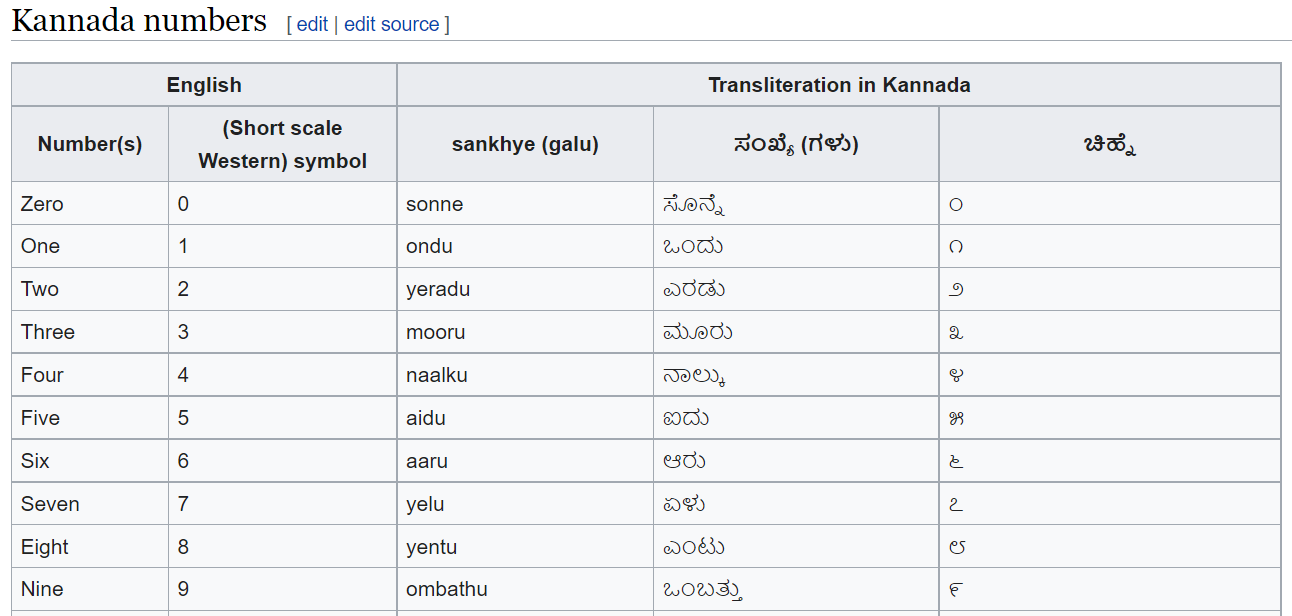

source: https://en.wikibooks.org/wiki/Kannada/Numbers

In [3]:
from google.colab import drive
from pathlib import Path
main_path = '/content/drive/MyDrive/machine_learning/'
# change working directory
#print(os.chdir(main_path))
# get current directory
print(os.getcwd())
os.listdir()


/content


['.config', 'sample_data']

In [4]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# **Loading Data**

In [5]:
# import train data set, identify X and y
data = pd.read_csv(main_path+'/train.csv')
print(data.shape)
print(data.columns)
y = data[data.columns[0]]
X = data[data.columns[1:]]

# import test data set, set aside nominal id values
test_data = pd.read_csv(main_path+'/test.csv')
print(test_data.shape)
print(test_data.columns)
test_ids = test_data[test_data.columns[0]]
X_test = test_data[test_data.columns[1:]]

(60000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
(5000, 785)
Index(['id', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


# **Cross-validation Design**

In [6]:
# First split the data set into an 80% raw and 20% test set
X_raw,X_val,y_raw,y_val  = train_test_split(X, y,test_size=0.2,stratify = y, random_state = 321)

**Figure 1: Cross-validation Design**

# **EDA**

In [54]:
print(X_raw.iloc[0,].max())

255


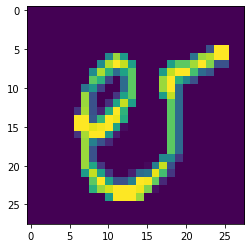

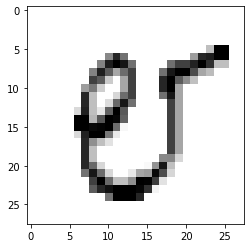

In [55]:
plt.imshow(X_raw.iloc[0,:].values.reshape(28,28).astype('uint8'))
plt.show()

plt.imshow(X_raw.iloc[0,:].values.reshape(28,28).astype('uint8'),cmap=plt.cm.binary)

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 8')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 6')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 8')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 3')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 8')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 5')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 5')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 6')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 3')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Number 7')

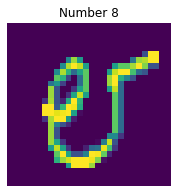

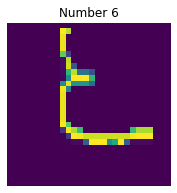

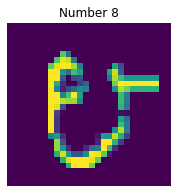

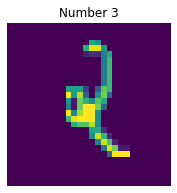

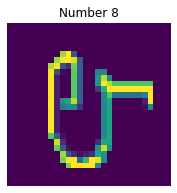

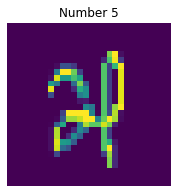

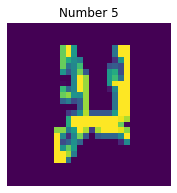

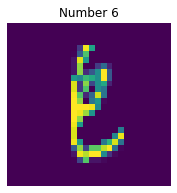

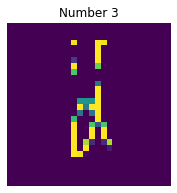

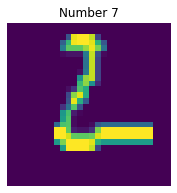

In [56]:
for i in range(10):
    num=X_raw.iloc[i,0:].values
    num=num.reshape(28,28).astype('uint8')
    fig = plt.figure(figsize=(4,3))
    plt.axis('off')
    plt.title('Number {}'.format(y_raw.iloc[i]))
    plt.imshow(num)

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

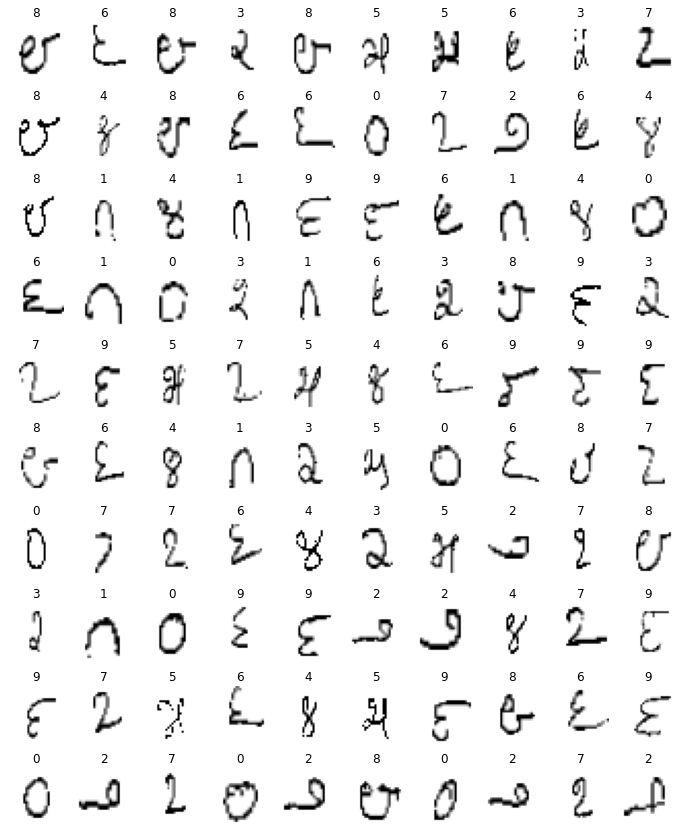

In [57]:
fig, axs = plt.subplots(10, 10, figsize = (12, 15))

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    num=X_raw.iloc[i,:].values
    num=num.reshape(28,28) #.astype('uint8')
    ax.imshow(num,cmap=plt.cm.binary)
    ax.axis('off')
    ax.set_title('{}'.format(y_raw.iloc[i]))
    
# display the figure
plt.show()

**Figure 2: EDA**

In [58]:
print(X_raw.iloc[9].values.reshape(28,28).astype('uint8')) #255 white # 0 black

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  67 247 255 255 232  52   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  78 170 251 255 255 245 164  70   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 107 191 191 191 216 249 204  96   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  13  13  13 105 233  62   6   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  97 232  52   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  97 232  52   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   9 105 232  5

In [59]:
X_raw.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [60]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [ ]:
def generate_stats(df):

    df_stats = pd.DataFrame()

    x = df 
    for column in x.columns:
        n = len(x)
        outliers = (n - len(x[np.abs(stats.zscore(x[column]) <3)]))/n
        mean = np.mean(x[column])
        std = np.std(x[column])
        mn = np.min(x[column])
        mx = np.max(x[column])
        pct25 = np.percentile(x[column], 25)
        pct50 = np.percentile(x[column], 50)
        pct75 = np.percentile(x[column], 75)
        
        iqr =  pct75 - pct25
        exn = sum(x[column] < pct25 - (3 * iqr))
        exp = sum(x[column] > pct75 + (3 * iqr))
        ex = exp + exn
        
        zeros = len(x[x[column] == 0])/n
        unique = len(np.unique(x[column]))
        kurt = kurtosis(x[column])
        skewness = skew(x[column])
        df_stats = df_stats.append(pd.DataFrame([[column,n, outliers, ex, mean, std, mn, mx,pct25, pct50, pct75,  iqr, zeros, unique,kurt, skewness]]), ignore_index = False)
        
    df_stats.columns = ['column', 'items', 'out', 'ex', 'mean', 'std','min','max','pct25', 'pct50','pct75','iqr', 'zeros', 'unique','kurtosis','skew']
    df_stats.set_index(keys = ['column'], drop = True, inplace = True)
    
    return df_stats

In [ ]:
X_stats = generate_stats(X_raw)

In [ ]:
print(X_stats.head(10))
print(X_stats.tail(10))

        items       out  ex      mean       std  min  max  pct25  pct50  \
column                                                                    
pixel0  48000  1.000000   0  0.000000  0.000000    0    0    0.0    0.0   
pixel1  48000  1.000000   0  0.000000  0.000000    0    0    0.0    0.0   
pixel2  48000  1.000000   0  0.000000  0.000000    0    0    0.0    0.0   
pixel3  48000  1.000000   0  0.000000  0.000000    0    0    0.0    0.0   
pixel4  48000  1.000000   0  0.000000  0.000000    0    0    0.0    0.0   
pixel5  48000  0.000063   3  0.011021  1.648264    0  255    0.0    0.0   
pixel6  48000  0.000146   8  0.032313  2.852137    0  255    0.0    0.0   
pixel7  48000  0.000250  12  0.035250  2.548931    0  255    0.0    0.0   
pixel8  48000  0.000333  16  0.059604  3.530134    0  255    0.0    0.0   
pixel9  48000  0.000625  31  0.110542  4.771922    0  255    0.0    0.0   

        pct75  iqr     zeros  unique      kurtosis        skew  
column                            

# **Normalization**

In [7]:
scaler = MinMaxScaler()
X_raw = pd.DataFrame(scaler.fit_transform(X_raw),columns=X_raw.columns,dtype='float64')
X_val = pd.DataFrame(scaler.fit_transform(X_val),columns=X_val.columns,dtype='float64')
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns,dtype='float64')


Normalizing data X_raw, X_val and X_test

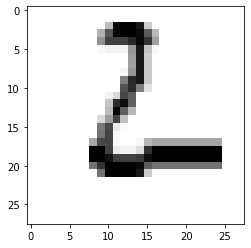


 7

 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.2627451  0.96862745
  1.         1.         0.90980392 0.20392157 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30588235 0.66666667 0.984313

In [62]:
plt.imshow(X_raw.iloc[9].values.reshape(28,28), cmap=plt.cm.binary)
plt.show()

print("\n", y_raw.iloc[9])
print("\n", X_raw.iloc[9].values.reshape(28,28))


In [ ]:
print(y_raw.shape)
print(y_val.shape)

(48000,)
(12000,)


# **Random Forest Classifier**

In [63]:
model = RandomForestClassifier()
start=datetime.now()
model.fit(X_raw,y_raw)
end=datetime.now()
print(f'\nRandom Forest Classifier Fitting - Start Time: {start}')
print(f'Random Forest Classifier Fitting - End Time: {end}')
print(f'Random Forest Classifier - Time to Fit: {end-start}')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Random Forest Classifier Fitting - Start Time: 2021-11-03 21:41:48.127227
Random Forest Classifier Fitting - End Time: 2021-11-03 21:42:15.037512
Random Forest Classifier - Time to Fit: 0:00:26.910285


In [64]:
predict= model.predict(X_val)
predict

array([4, 0, 6, ..., 9, 2, 0])

In [65]:
cm= metrics.confusion_matrix(y_val,model.predict(X_val))
cm

array([[1168,   23,    0,    4,    0,    1,    2,    0,    1,    1],
       [   2, 1192,    0,    2,    0,    0,    0,    1,    1,    2],
       [   2,    1, 1195,    1,    0,    1,    0,    0,    0,    0],
       [  10,    0,    0, 1172,    3,    7,    2,    6,    0,    0],
       [   2,    0,    0,    5, 1180,    8,    1,    0,    3,    1],
       [   0,    0,    1,    2,   12, 1185,    0,    0,    0,    0],
       [   0,    0,    0,   13,    3,    0, 1167,   15,    0,    2],
       [   0,    0,    0,   25,    6,    1,   32, 1131,    1,    4],
       [   2,    1,    0,    0,    0,    1,    0,    0, 1194,    2],
       [   0,    0,    0,    2,    6,    1,   17,    8,    0, 1166]])

<Figure size 648x648 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for MNIST Data')

([<matplotlib.axis.XTick at 0x7ff273d41750>,
 <a list of 10 Text major ticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff273d6a710>,
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Actual Label')

Text(0.5, 0, 'Predicted Label')

Text(0, 0, '1168')

Text(1, 0, '23')

Text(2, 0, '0')

Text(3, 0, '4')

Text(4, 0, '0')

Text(5, 0, '1')

Text(6, 0, '2')

Text(7, 0, '0')

Text(8, 0, '1')

Text(9, 0, '1')

Text(0, 1, '2')

Text(1, 1, '1192')

Text(2, 1, '0')

Text(3, 1, '2')

Text(4, 1, '0')

Text(5, 1, '0')

Text(6, 1, '0')

Text(7, 1, '1')

Text(8, 1, '1')

Text(9, 1, '2')

Text(0, 2, '2')

Text(1, 2, '1')

Text(2, 2, '1195')

Text(3, 2, '1')

Text(4, 2, '0')

Text(5, 2, '1')

Text(6, 2, '0')

Text(7, 2, '0')

Text(8, 2, '0')

Text(9, 2, '0')

Text(0, 3, '10')

Text(1, 3, '0')

Text(2, 3, '0')

Text(3, 3, '1172')

Text(4, 3, '3')

Text(5, 3, '7')

Text(6, 3, '2')

Text(7, 3, '6')

Text(8, 3, '0')

Text(9, 3, '0')

Text(0, 4, '2')

Text(1, 4, '0')

Text(2, 4, '0')

Text(3, 4, '5')

Text(4, 4, '1180')

Text(5, 4, '8')

Text(6, 4, '1')

Text(7, 4, '0')

Text(8, 4, '3')

Text(9, 4, '1')

Text(0, 5, '0')

Text(1, 5, '0')

Text(2, 5, '1')

Text(3, 5, '2')

Text(4, 5, '12')

Text(5, 5, '1185')

Text(6, 5, '0')

Text(7, 5, '0')

Text(8, 5, '0')

Text(9, 5, '0')

Text(0, 6, '0')

Text(1, 6, '0')

Text(2, 6, '0')

Text(3, 6, '13')

Text(4, 6, '3')

Text(5, 6, '0')

Text(6, 6, '1167')

Text(7, 6, '15')

Text(8, 6, '0')

Text(9, 6, '2')

Text(0, 7, '0')

Text(1, 7, '0')

Text(2, 7, '0')

Text(3, 7, '25')

Text(4, 7, '6')

Text(5, 7, '1')

Text(6, 7, '32')

Text(7, 7, '1131')

Text(8, 7, '1')

Text(9, 7, '4')

Text(0, 8, '2')

Text(1, 8, '1')

Text(2, 8, '0')

Text(3, 8, '0')

Text(4, 8, '0')

Text(5, 8, '1')

Text(6, 8, '0')

Text(7, 8, '0')

Text(8, 8, '1194')

Text(9, 8, '2')

Text(0, 9, '0')

Text(1, 9, '0')

Text(2, 9, '0')

Text(3, 9, '2')

Text(4, 9, '6')

Text(5, 9, '1')

Text(6, 9, '17')

Text(7, 9, '8')

Text(8, 9, '0')

Text(9, 9, '1166')

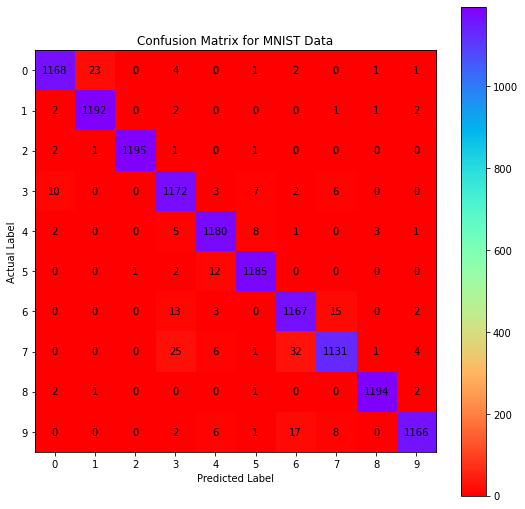

In [66]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [67]:
trainaccuracy= accuracy_score(y_val,model.predict(X_val))
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

0.9791666666666666

Validation Data Accuracy:  97.92%


In [68]:
classifier_rf = RandomForestClassifier(random_state=321, n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator=classifier_rf, param_distributions=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [69]:

start=datetime.now()
grid_search.fit(X_raw,y_raw)
end=datetime.now()
print(f'\nRandom Forest Classifier Fitting - Start Time: {start}')
print(f'Random Forest Classifier Fitting - End Time: {end}')
print(f'Random Forest Classifier - Time to Fit: {end-start}')


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   43.7s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               


Random Forest Classifier Fitting - Start Time: 2021-11-03 21:44:04.981007
Random Forest Classifier Fitting - End Time: 2021-11-03 21:44:52.193317
Random Forest Classifier - Time to Fit: 0:00:47.212310


In [70]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)

**Figure 3: Random Forest Classifier**

In [71]:
cm= metrics.confusion_matrix(y_val,rf_best.predict(X_val))
cm

array([[1098,   65,    2,   13,    2,    0,    2,    0,   17,    1],
       [   6, 1171,    0,    9,    4,    0,    0,    0,    1,    9],
       [  11,    1, 1184,    2,    1,    0,    0,    0,    1,    0],
       [  12,    1,    3, 1120,   19,    9,    6,   30,    0,    0],
       [   3,    0,    0,    7, 1165,   16,    1,    0,    3,    5],
       [   0,    2,    8,    8,   36, 1146,    0,    0,    0,    0],
       [   0,    0,    1,   12,    6,    0, 1130,   46,    1,    4],
       [   1,    0,    0,   51,   34,    2,  153,  956,    1,    2],
       [  27,    3,    0,    9,   13,    0,    1,    0, 1139,    8],
       [   2,    0,    0,    5,   30,    0,   13,   19,    6, 1125]])

<Figure size 648x648 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for MNIST Data')

([<matplotlib.axis.XTick at 0x7ff273be8590>,
 <a list of 10 Text major ticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff273b8cdd0>,
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Actual Label')

Text(0.5, 0, 'Predicted Label')

Text(0, 0, '1098')

Text(1, 0, '65')

Text(2, 0, '2')

Text(3, 0, '13')

Text(4, 0, '2')

Text(5, 0, '0')

Text(6, 0, '2')

Text(7, 0, '0')

Text(8, 0, '17')

Text(9, 0, '1')

Text(0, 1, '6')

Text(1, 1, '1171')

Text(2, 1, '0')

Text(3, 1, '9')

Text(4, 1, '4')

Text(5, 1, '0')

Text(6, 1, '0')

Text(7, 1, '0')

Text(8, 1, '1')

Text(9, 1, '9')

Text(0, 2, '11')

Text(1, 2, '1')

Text(2, 2, '1184')

Text(3, 2, '2')

Text(4, 2, '1')

Text(5, 2, '0')

Text(6, 2, '0')

Text(7, 2, '0')

Text(8, 2, '1')

Text(9, 2, '0')

Text(0, 3, '12')

Text(1, 3, '1')

Text(2, 3, '3')

Text(3, 3, '1120')

Text(4, 3, '19')

Text(5, 3, '9')

Text(6, 3, '6')

Text(7, 3, '30')

Text(8, 3, '0')

Text(9, 3, '0')

Text(0, 4, '3')

Text(1, 4, '0')

Text(2, 4, '0')

Text(3, 4, '7')

Text(4, 4, '1165')

Text(5, 4, '16')

Text(6, 4, '1')

Text(7, 4, '0')

Text(8, 4, '3')

Text(9, 4, '5')

Text(0, 5, '0')

Text(1, 5, '2')

Text(2, 5, '8')

Text(3, 5, '8')

Text(4, 5, '36')

Text(5, 5, '1146')

Text(6, 5, '0')

Text(7, 5, '0')

Text(8, 5, '0')

Text(9, 5, '0')

Text(0, 6, '0')

Text(1, 6, '0')

Text(2, 6, '1')

Text(3, 6, '12')

Text(4, 6, '6')

Text(5, 6, '0')

Text(6, 6, '1130')

Text(7, 6, '46')

Text(8, 6, '1')

Text(9, 6, '4')

Text(0, 7, '1')

Text(1, 7, '0')

Text(2, 7, '0')

Text(3, 7, '51')

Text(4, 7, '34')

Text(5, 7, '2')

Text(6, 7, '153')

Text(7, 7, '956')

Text(8, 7, '1')

Text(9, 7, '2')

Text(0, 8, '27')

Text(1, 8, '3')

Text(2, 8, '0')

Text(3, 8, '9')

Text(4, 8, '13')

Text(5, 8, '0')

Text(6, 8, '1')

Text(7, 8, '0')

Text(8, 8, '1139')

Text(9, 8, '8')

Text(0, 9, '2')

Text(1, 9, '0')

Text(2, 9, '0')

Text(3, 9, '5')

Text(4, 9, '30')

Text(5, 9, '0')

Text(6, 9, '13')

Text(7, 9, '19')

Text(8, 9, '6')

Text(9, 9, '1125')

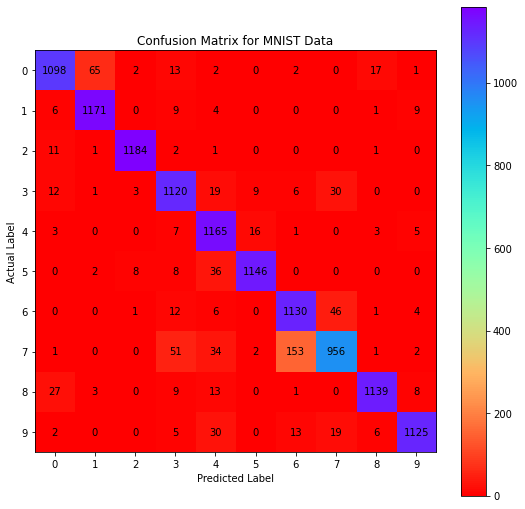

In [72]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [73]:
trainaccuracy= accuracy_score(y_val,rf_best.predict(X_val))
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

0.9361666666666667

Validation Data Accuracy:  93.62%


In [74]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_val, rf_best.predict(X_val)))

print ("Confusion matrix")
print(confusion_matrix(y_val,rf_best.predict(X_val)))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1200
           1       0.94      0.98      0.96      1200
           2       0.99      0.99      0.99      1200
           3       0.91      0.93      0.92      1200
           4       0.89      0.97      0.93      1200
           5       0.98      0.95      0.97      1200
           6       0.87      0.94      0.90      1200
           7       0.91      0.80      0.85      1200
           8       0.97      0.95      0.96      1200
           9       0.97      0.94      0.96      1200

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

Confusion matrix
[[1098   65    2   13    2    0    2    0   17    1]
 [   6 1171    0    9    4    0    0    0    1    9]
 [  11    1 1184    2    1    0    0    0    1    0]
 [  12    1    3 1120   19    9    6  

In [76]:
#generate predictions from trained RandomForestClassifier on transformed test data, report out times/speeds
start=datetime.now()
test_predictions = rf_best.predict(X_test)
end=datetime.now()
print(f'\nRandom Forest Classifier Fitting - Start Time: {start}')
print(f'Random Forest Classifier Fitting - End Time: {end}')
print(f'Random Forest Classifier - Time to Fit: {end-start}')



Random Forest Classifier Fitting - Start Time: 2021-11-03 21:50:43.387283
Random Forest Classifier Fitting - End Time: 2021-11-03 21:50:43.603725
Random Forest Classifier - Time to Fit: 0:00:00.216442


In [ ]:
# if os.path.exists('./submission.csv'):
#   os.remove('./submission.csv')
# else:
#   print("The file does not exist")

In [ ]:

# # format predictions to dataframe and output submission file
# test_predictions = pd.DataFrame({'id': test_ids,
#                                  'label': test_predictions})

# test_predictions.to_csv('./submission.csv',
#                          header=['id', 'label'],
#                          index=False)

## Submission Score: 0.8822 


# **Principal Components Analysis (PCA)**

In [110]:
principal_components = PCA(n_components=.95)

X_raw_scaled = X_raw.values
#raw_scaled = StandardScaler().fit_transform(X_raw_scaled)

# fit PCA transformer and report out times/speeds

pca_start=datetime.now()
principal_components.fit(X_raw_scaled)
X_raw_pca = principal_components.transform(X_raw_scaled)
pca_end=datetime.now()
print(f'\nPCA Fitting - Start Time: {pca_start}')
print(f'PCA Fitting - End Time: {pca_end}')
print(f'PCA - Time to Fit: {pca_end-pca_start}')

# transform training indepdent features with PCA transformer
# report out times/speeds
X_val_pca = principal_components.transform(X_val.values)
X_test_pca = principal_components.transform(X_test.values)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


PCA Fitting - Start Time: 2021-11-03 22:20:50.970144
PCA Fitting - End Time: 2021-11-03 22:21:01.383281
PCA - Time to Fit: 0:00:10.413137


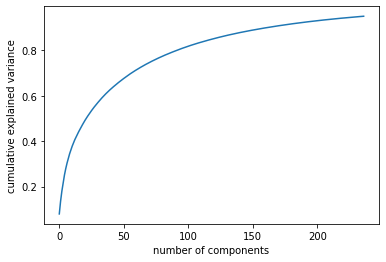

In [111]:
plt.plot(np.cumsum(principal_components.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [112]:
principal_components.n_components_

237

In [113]:
# create new RandomForestClassifier instance, fit w/ transformed train data, report out times/speeds
classifier_rf = RandomForestClassifier(random_state=321, n_jobs=-1)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator=classifier_rf, param_distributions=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

start=datetime.now()
grid_search.fit(X_raw_pca,y_raw)
end=datetime.now()
print(f'\nRandom Forest Classifier with PCA Fitting - Start Time: {start}')
print(f'Random Forest Classifier with PCA Fitting - End Time: {end}')
print(f'Random Forest Classifier with PCA - Time to Fit: {end-start}')

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               


Random Forest Classifier with PCA Fitting - Start Time: 2021-11-03 22:21:13.088195
Random Forest Classifier with PCA Fitting - End Time: 2021-11-03 22:25:38.749193
Random Forest Classifier with PCA - Time to Fit: 0:04:25.660998


In [114]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)

**Figure 4: Random Forest Classifier with Principal Components Analysis (PCA)**

In [115]:
cm= metrics.confusion_matrix(y_val,rf_best.predict(X_val_pca))
cm

array([[1105,   59,    5,    4,    4,    4,    1,    1,   15,    2],
       [  13, 1172,    0,    6,    2,    1,    0,    0,    2,    4],
       [   4,    5, 1182,    3,    1,    4,    0,    0,    1,    0],
       [  20,    1,    2, 1109,   16,   21,   10,   20,    1,    0],
       [   2,    0,    0,    5, 1145,   34,    3,    3,    5,    3],
       [   0,    4,    2,    9,   41, 1136,    0,    2,    5,    1],
       [   0,    3,    0,   12,    5,    1, 1133,   40,    1,    5],
       [   5,    4,    0,   31,   31,    2,  111, 1010,    1,    5],
       [  27,    2,    1,    2,    8,    6,    1,    0, 1145,    8],
       [   2,    1,    1,    1,   18,    1,   16,   18,   10, 1132]])

<Figure size 648x648 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for MNIST Data')

([<matplotlib.axis.XTick at 0x7ff2eab24c10>,
 <a list of 10 Text major ticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff2eab22850>,
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Actual Label')

Text(0.5, 0, 'Predicted Label')

Text(0, 0, '1105')

Text(1, 0, '59')

Text(2, 0, '5')

Text(3, 0, '4')

Text(4, 0, '4')

Text(5, 0, '4')

Text(6, 0, '1')

Text(7, 0, '1')

Text(8, 0, '15')

Text(9, 0, '2')

Text(0, 1, '13')

Text(1, 1, '1172')

Text(2, 1, '0')

Text(3, 1, '6')

Text(4, 1, '2')

Text(5, 1, '1')

Text(6, 1, '0')

Text(7, 1, '0')

Text(8, 1, '2')

Text(9, 1, '4')

Text(0, 2, '4')

Text(1, 2, '5')

Text(2, 2, '1182')

Text(3, 2, '3')

Text(4, 2, '1')

Text(5, 2, '4')

Text(6, 2, '0')

Text(7, 2, '0')

Text(8, 2, '1')

Text(9, 2, '0')

Text(0, 3, '20')

Text(1, 3, '1')

Text(2, 3, '2')

Text(3, 3, '1109')

Text(4, 3, '16')

Text(5, 3, '21')

Text(6, 3, '10')

Text(7, 3, '20')

Text(8, 3, '1')

Text(9, 3, '0')

Text(0, 4, '2')

Text(1, 4, '0')

Text(2, 4, '0')

Text(3, 4, '5')

Text(4, 4, '1145')

Text(5, 4, '34')

Text(6, 4, '3')

Text(7, 4, '3')

Text(8, 4, '5')

Text(9, 4, '3')

Text(0, 5, '0')

Text(1, 5, '4')

Text(2, 5, '2')

Text(3, 5, '9')

Text(4, 5, '41')

Text(5, 5, '1136')

Text(6, 5, '0')

Text(7, 5, '2')

Text(8, 5, '5')

Text(9, 5, '1')

Text(0, 6, '0')

Text(1, 6, '3')

Text(2, 6, '0')

Text(3, 6, '12')

Text(4, 6, '5')

Text(5, 6, '1')

Text(6, 6, '1133')

Text(7, 6, '40')

Text(8, 6, '1')

Text(9, 6, '5')

Text(0, 7, '5')

Text(1, 7, '4')

Text(2, 7, '0')

Text(3, 7, '31')

Text(4, 7, '31')

Text(5, 7, '2')

Text(6, 7, '111')

Text(7, 7, '1010')

Text(8, 7, '1')

Text(9, 7, '5')

Text(0, 8, '27')

Text(1, 8, '2')

Text(2, 8, '1')

Text(3, 8, '2')

Text(4, 8, '8')

Text(5, 8, '6')

Text(6, 8, '1')

Text(7, 8, '0')

Text(8, 8, '1145')

Text(9, 8, '8')

Text(0, 9, '2')

Text(1, 9, '1')

Text(2, 9, '1')

Text(3, 9, '1')

Text(4, 9, '18')

Text(5, 9, '1')

Text(6, 9, '16')

Text(7, 9, '18')

Text(8, 9, '10')

Text(9, 9, '1132')

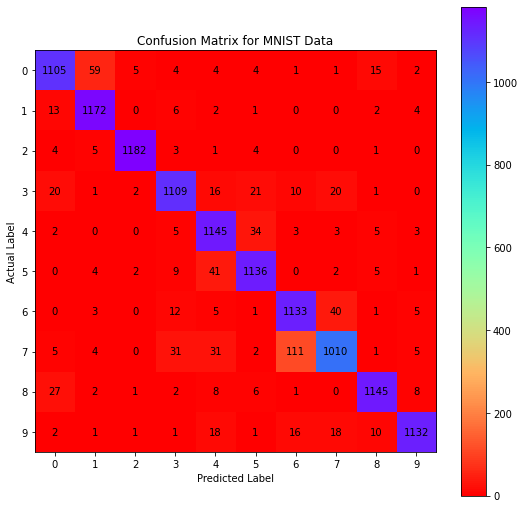

In [116]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [117]:
trainaccuracy= accuracy_score(y_val,rf_best.predict(X_val_pca))
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

0.9390833333333334

Validation Data Accuracy:  93.91%


In [118]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_val, rf_best.predict(X_val_pca)))

print ("Confusion matrix")
print(confusion_matrix(y_val,rf_best.predict(X_val_pca)))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1200
           1       0.94      0.98      0.96      1200
           2       0.99      0.98      0.99      1200
           3       0.94      0.92      0.93      1200
           4       0.90      0.95      0.93      1200
           5       0.94      0.95      0.94      1200
           6       0.89      0.94      0.92      1200
           7       0.92      0.84      0.88      1200
           8       0.97      0.95      0.96      1200
           9       0.98      0.94      0.96      1200

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

Confusion matrix
[[1105   59    5    4    4    4    1    1   15    2]
 [  13 1172    0    6    2    1    0    0    2    4]
 [   4    5 1182    3    1    4    0    0    1    0]
 [  20    1    2 1109   16   21   10  

In [ ]:
# if os.path.exists('./submission.csv'):
#   os.remove('./submission.csv')
# else:
#   print("The file does not exist")

In [ ]:
# generate predictions from trained RandomForestClassifier on transformed test data, report out times/speeds
# start=datetime.now()
# test_predictions2 = rf_best.predict(X_test_pca)
# end=datetime.now()
# print(f'\nRandom Forest Classifier with PCA Fitting - Start Time: {start}')
# print(f'Random Forest Classifier with PCA Fitting - End Time: {end}')
# print(f'Random Forest Classifier with PCA - Time to Fit: {end-start}')

# # format predictions to dataframe and output submission file
# test_predictions2 = pd.DataFrame({'id': test_ids,
#                                  'label': test_predictions2})

# test_predictions2.to_csv('./submission.csv',
#                          header=['id', 'label'],
#                          index=False)

## Submission Score: 0.8498

**Figure 4.1: Select n_component for PCA**

In [ ]:
classifier_rf = RandomForestClassifier(random_state=321, n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

def n_component_analysis(n,X_train, y_train, X_val, y_val,kernel_type="linear"):

    print("\nPCA begin with n_components: {}".format(n))

    X_raw_scaled = X_raw.values
    #X_raw_scaled = MinMaxScaler().fit_transform(X_raw_scaled)

    principal_components = PCA(n_components=n)
    principal_components.fit(X_raw_scaled)
    X_raw_pca = principal_components.transform(X_raw_scaled)
    X_val_pca = principal_components.transform(MinMaxScaler().fit_transform(X_val.values))

    # Instantiate the grid search model
    grid_search = RandomizedSearchCV(estimator=classifier_rf, param_distributions=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

    grid_search.fit(X_raw_pca, y_raw)
    print(grid_search.best_estimator_)

    predictions=grid_search.predict(X_val_pca)
    accuracy = metrics.accuracy_score(y_val,predictions)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

In [ ]:
n_s = np.linspace(0.20, 0.99, num=20)
accuracy = []
for n in n_s:
    tmp = n_component_analysis(n,X_raw, y_raw, X_val, y_val)
    accuracy.append(tmp)


PCA begin with n_components: 0.2
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.8055833333333333

PCA begin with n_components: 0.24157894736842106
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.88275

PCA begin with n_components: 0.2831578947368421
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.91

PCA begin with n_components: 0.3247368421052632
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9364166666666667

PCA begin with n_components: 0.36631578947368426
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.945

PCA begin with n_components: 0.4078947368421053
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9444166666666667

PCA begin with n_components: 0.44947368421052636
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9585

PCA begin with n_components: 0.4910526315789474
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9613333333333334

PCA begin with n_components: 0.5326315789473685
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9640833333333333

PCA begin with n_components: 0.5742105263157895
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9634166666666667

PCA begin with n_components: 0.6157894736842106
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.94575

PCA begin with n_components: 0.6573684210526316
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9594166666666667

PCA begin with n_components: 0.6989473684210528
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9505

PCA begin with n_components: 0.7405263157894737
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9565

PCA begin with n_components: 0.7821052631578949
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9486666666666667

PCA begin with n_components: 0.8236842105263158
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9408333333333333

PCA begin with n_components: 0.865263157894737
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9518333333333333

PCA begin with n_components: 0.9068421052631579
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9396666666666667

PCA begin with n_components: 0.948421052631579
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.9095

PCA begin with n_components: 0.99
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)
accuracy: 0.8881666666666667


<Figure size 432x288 with 0 Axes>

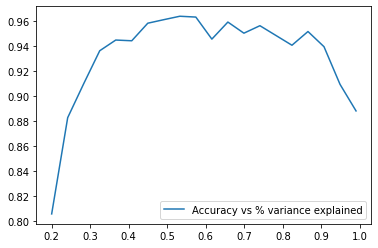

In [ ]:
plt.figure()
plt.plot(n_s,np.array(accuracy),label='Accuracy vs % variance explained')
plt.legend()
plt.show()

# K-Means Clustering

In [ ]:
n_digits = len(np.unique(y_raw))
print(n_digits)

In [ ]:
start=datetime.now()
kmeans = MiniBatchKMeans(n_clusters=n_digits)
kmeans.fit(X_raw)
end=datetime.now()
print(f'\nK-Means Clustering - Start Time: {start}')
print(f'K-Means Clustering - End Time: {end}')
print(f'K-Means Clustering - Time to Fit: {end-start}')

In [ ]:
kmeans.labels_

In [ ]:
 
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    # Loop through the clusters
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        
        try:
            # assign the cluster to a value in the inferred_labels dictionary
            if np.argmax(counts) in inferred_labels:
                # append the new number to the existing array at this slot
                inferred_labels[np.argmax(counts)].append(i)
            else:
                # create a new array in this slot
                inferred_labels[np.argmax(counts)] = [i]
        except ValueError:
            pass
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = estimator.inertia_
    print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = homogeneity_score(labels, estimator.labels_)
    print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

In [ ]:
cluster_labels = infer_cluster_labels(kmeans, y_raw.values)
X_clusters = kmeans.predict(X_raw)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y_raw[:20])

In [ ]:

clusters = range(10,300,10) #[10, 16, 36, 64, 144, 200,250]
iner_list = []
homo_list = []
acc_list = []

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X_val)
    
    inertia, homo = calc_metrics(estimator, X_val, y_val)
    iner_list.append(inertia)
    homo_list.append(homo)
    
    # Determine predicted labels
    
    cluster_labels = infer_cluster_labels(estimator, y_val.values)
    prediction = infer_data_labels(estimator.labels_, cluster_labels)
    
    acc = accuracy_score(y_val, prediction)
    acc_list.append(acc)
    print('Accuracy: {}\n'.format(acc))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].plot(clusters, iner_list, label='inertia', marker='o')
ax[1].plot(clusters, homo_list, label='homogeneity', marker='o')
ax[1].plot(clusters, acc_list, label='accuracy', marker='^')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].grid('on')
ax[1].grid('on')
ax[0].set_title('Inertia of each clusters')
ax[1].set_title('Homogeneity and Accuracy of each clusters')
plt.show()

In [ ]:
start=datetime.now()
kmeans = MiniBatchKMeans(n_clusters = 260)
kmeans.fit(X_val)
end=datetime.now()
print(f'\nK-Means Clustering - Start Time: {start}')
print(f'K-Means Clustering - End Time: {end}')
print(f'K-Means Clustering - Time to Fit: {end-start}')

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(260, 28, 28)
#images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, y_val.values)
prediction = infer_data_labels(kmeans.predict(X_val), cluster_labels)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(5, 5, figsize = (12, 15))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():        
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key), color='blue')
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
plt.show()

**Figure 5: K-Means Clustering**

In [ ]:
# if os.path.exists('./submission.csv'):
#   os.remove('./submission.csv')
# else:
#   print("The file does not exist")

In [ ]:
# generate predictions from trained RandomForestClassifier on transformed test data, report out times/speeds
# start=datetime.now()
# test_predictions3 = kmeans.predict(X_test)/255
# end=datetime.now()

# # format predictions to dataframe and output submission file
# test_predictions3 = pd.DataFrame({'id': test_ids,
#                                  'label': test_predictions3})

# test_predictions3.to_csv('./submission.csv',
#                          header=['id', 'label'],
#                          index=False)

## Submission Score: NA

In [ ]:
# print(test_predictions3[10:])

In [ ]:
kVals = range(1, 30, 10)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in kVals:
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(X_raw, y_raw)
          # evaluate the model and update the accuracies list
          score = model.score(X_val, y_val)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          
# find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], accuracies[i] * 100))


In [ ]:
best_k = 1

start=datetime.now()
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_raw, y_raw)
predictions = model.predict(X_val)
end=datetime.now()
print(f'\nKNeighbors Classifier - Start Time: {start}')
print(f'KNeighbors Classifier - End Time: {end}')
print(f'KNeighbors Classifier - Time to Fit: {end-start}')

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(y_val, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_val,predictions))

In [ ]:
trainaccuracy= accuracy_score(y_val, predictions)
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

In [ ]:
# if os.path.exists('./submission.csv'):
#   os.remove('./submission.csv')
# else:
#   print("The file does not exist")

In [ ]:
# knn_predictions = model.predict(X_test)

# # format predictions to dataframe and output submission file
# test_predictions4 = pd.DataFrame({'id': test_ids,
#                                  'label': knn_predictions})

# test_predictions4.to_csv('./submission.csv',
#                          header=['id', 'label'],
#                          index=False)

## Submission Score: 0.9208

In [ ]:
kVals = range(1, 30, 5)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in kVals:
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(X_raw_pca, y_raw)
          # evaluate the model and update the accuracies list
          score = model.score(X_val_pca, y_val)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          
# find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], 
accuracies[i] * 100))



In [ ]:
best_k = 1

start=datetime.now()
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_raw_pca, y_raw)
predictions = model.predict(X_val)
end=datetime.now()
print(f'\nKNeighbors Classifier - Start Time: {start}')
print(f'KNeighbors Classifier - End Time: {end}')
print(f'KNeighbors Classifier - Time to Fit: {end-start}')

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(y_val, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_val,predictions))

# **Support Vector Machine (SVM)**

In [119]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state =321)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10],
                  'kernel':['linear','rbf']
                 }]

# specify model
model = SVC(random_state=321)

model_cv = RandomizedSearchCV(estimator=model, param_distributions=hyper_params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [ ]:
# fit the model
start=datetime.now()
model_cv.fit(X_raw, y_raw)
end=datetime.now()
print(f'\SVC - Start Time: {start}')
print(f'SVC - End Time: {end}')
print(f'SVC - Time to Fit: {end-start}')

In [ ]:
# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_raw, y_raw)
y_pred = model.predict(X_val)

# metrics
print("accuracy", metrics.accuracy_score(y_val, y_pred), "\n")
print(metrics.confusion_matrix(y_val, y_pred), "\n")

# **Simple Neural Network**

**Figure 6: Simple Neural Network**

In [ ]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution


In [ ]:
start=datetime.now()

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(X_raw, y_raw, epochs=3)  # train the model

end=datetime.now()
print(f'\n1st Deep Neural Network Fitting - Start Time: {start}')
print(f'1st Deep Neural Network Fitting - End Time: {end}')
print(f'1st Deep Neural Network - Time to Fit: {end-start}')


Epoch 1/3
1500/1500 [==============================] - 7s 3ms/step - loss: 1.1847 - accuracy: 0.9243
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2429 - accuracy: 0.9654
Epoch 3/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1448 - accuracy: 0.9734



1st Deep Neural Network Fitting - Start Time: 2021-11-03 19:03:23.986739
1st Deep Neural Network Fitting - End Time: 2021-11-03 19:03:45.657101
1st Deep Neural Network - Time to Fit: 0:00:21.670362


In [ ]:
val_loss, val_acc = model.evaluate(X_val, y_val)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

375/375 [==============================] - 1s 2ms/step - loss: 0.0455 - accuracy: 0.9853
0.045493513345718384
0.9853333234786987


In [ ]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [ ]:
predictions = new_model.predict(X_val)

4


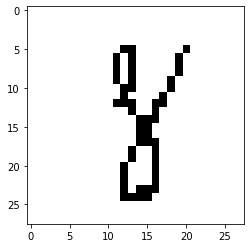

In [ ]:
print(np.argmax(predictions[0]))
plt.imshow(X_val.iloc[0,:].values.reshape(28,28).astype('uint8'),cmap=plt.cm.binary)
plt.show()

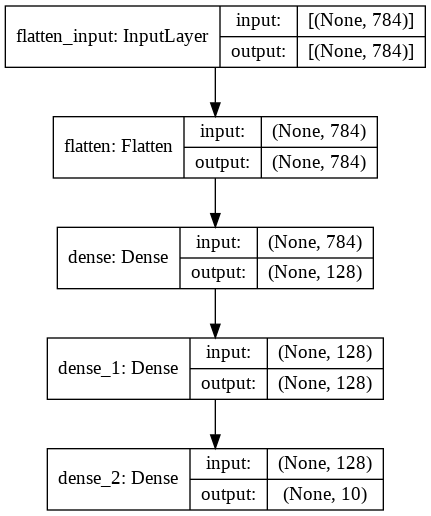

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
y_predicted = model.predict(X_val)
y_grand_truth = to_categorical(y_val)
y_predicted = y_predicted.argmax(axis=1)
y_grand_truth = y_grand_truth.argmax(axis=1)

cm = confusion_matrix(y_grand_truth, y_predicted)
cm

array([[1179,   13,    1,    2,    0,    0,    2,    0,    3,    0],
       [  11, 1186,    0,    2,    0,    0,    0,    1,    0,    0],
       [   1,    0, 1195,    0,    0,    1,    0,    0,    2,    1],
       [   2,    0,    0, 1188,    2,    2,    2,    4,    0,    0],
       [   0,    0,    0,    4, 1188,    3,    0,    1,    2,    2],
       [   0,    0,    1,    4,   11, 1183,    0,    0,    1,    0],
       [   1,    0,    0,    1,    0,    0, 1159,   29,    0,   10],
       [   1,    1,    0,   10,    1,    0,   20, 1166,    0,    1],
       [   1,    1,    0,    0,    0,    0,    0,    0, 1196,    2],
       [   4,    0,    1,    1,    1,    0,    7,    1,    1, 1184]])

In [ ]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_grand_truth, y_predicted))

print ("Confusion matrix")
print(confusion_matrix(y_grand_truth, y_predicted))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1200
           1       0.99      0.99      0.99      1200
           2       1.00      1.00      1.00      1200
           3       0.98      0.99      0.99      1200
           4       0.99      0.99      0.99      1200
           5       0.99      0.99      0.99      1200
           6       0.97      0.97      0.97      1200
           7       0.97      0.97      0.97      1200
           8       0.99      1.00      0.99      1200
           9       0.99      0.99      0.99      1200

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

Confusion matrix
[[1179   13    1    2    0    0    2    0    3    0]
 [  11 1186    0    2    0    0    0    1    0    0]
 [   1    0 1195    0    0    1    0    0    2    1]
 [   2    0    0 1188    2    2    2  

In [ ]:
# if os.path.exists('./submission.csv'):
#   os.remove('./submission.csv')
# else:
#   print("The file does not exist")

In [ ]:
# # format predictions to dataframe and output submission file
# y_test_predicted = model.predict(X_test)
# y_test_predicted = y_test_predicted.argmax(axis=1)

# predictions = pd.DataFrame({'id': test_ids,
#                                  'label': y_test_predicted})

# print(predictions[10:])
# predictions.to_csv('./submission.csv',
#                          header=['id', 'label'],
#                          index=False)

## Submission Score: 0.907

# **Simple MLP or CNN Models**

In [179]:
def reshape(x, model='cnn'):
    if model == 'mlp':
        return x.values.reshape(x.shape[0], -1)  # -1 flattens rest of dimensions: no change
    else:
        # model == 'cnn'
        return x.values.reshape(x.shape[0], 28, 28, 1)  # 1 for greyscale, 3 for rgb

In [180]:
def one_hot(y):
    return to_categorical(y, np.max(y) + 1)

def model_performance(model, x_train, x_test, y_test):
    predictions = model.predict(x_test)  # same as predict_proba in softmax output
    y_pred = np.argmax(np.round(predictions), axis=1)
    y_test_og = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_og, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test_og, y_pred)
    # auc = roc_auc_score(y_test_og, predictions)  # need 1-vs-all approach for auc-roc curve
    loss = log_loss(y_test_og, predictions)
    report = classification_report(y_test_og, y_pred)
    matrix = confusion_matrix(y_test_og, y_pred)

    tp = sum(np.diagonal(matrix))
    fp = np.sum(matrix, axis=0) - tp
    tn = 0  # must be computed per class
    fn = np.sum(matrix, axis=1) - tp

    print(f'training cases={x_train.shape[0]}, validation cases={y_test.shape[0]}, possible outcomes={y_test.shape[1]}')
    print(f'accuracy={accuracy:.2f}%, balanced_accuracy={balanced_accuracy:.2f}%, loss={loss:.3f}')
    # print(f'auc={auc:.3f}')
    print(report)

def mlp(x, y):
    """Multilayer Perceptron"""
    # Initialise MLP
    # Input layer with nodes=number of features in the dataset
    model = Sequential()
    # Hidden layer, one hidden layer is sufficient for the large majority of problems
    model.add(Dense(512, activation='relu', input_shape=(x.shape[1],)))
    model.add(Dropout(0.2))  # apply dropout to input, randomly setting a fraction rate of input units to 0 at each
    # update during training time, which helps prevent overfitting
    # Hidden layer, size between input and output layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    # Output layer, one node unless 'softmax' in multi-class problems
    model.add(Dense(y.shape[1], activation='softmax'))
    # Compile
    model.compile(loss=keras.losses.categorical_crossentropy,  # 'sparse_categorical_crossentropy' doesn't require oh
                  optimizer='rmsprop',
                  metrics=['accuracy'])  # more metric history available https://keras.io/metrics/
    return model

def cnn(x, y):
    """Convolutional Neural Network"""
    # Initialise CNN
    # Input layer
    model = Sequential()
    # Hidden layer
    model.add(Conv2D(64, (3, 3), input_shape=(x.shape[1], x.shape[2], 1)))  # 64 filters (output space), 3x3 convolution
    # BatchNormalization() aids with overfitting, according to authors and Andrew Ng it should be applied immediately
    # before activation function (non-linearity)
    model.add(BatchNormalization())
    model.add(Activation('relu'))  # rectified linear unit (fire or not)
    model.add(MaxPooling2D(pool_size=(2, 2)))  # maximum value for each patch on feature map reduced by 2x2 pool_size
    # Hidden layer
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Output Layer
    model.add(Flatten())  # flattens the input
    model.add(Dense(64))  # regular densely connected NN layer, no activation function means linear activation
    model.add(Dense(y.shape[1]))  # can also do e.g. model.add(Dense(64, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))  # softmax activation function as output, turns into weights that sum to 1
    # Compile
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

def plot_model_history(metric):
    plt.figure()
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'valiation'], loc='upper left')
    plt.show()

## Simple MLP

In [30]:
# define model
ml_model = mlp

In [31]:
X_raw2, X_val2, X_test2 = reshape(X_raw, ml_model.__name__), reshape(X_val, ml_model.__name__), reshape(X_test, ml_model.__name__)
y_raw2, y_val2 = one_hot(y_raw), one_hot(y_val)


In [32]:
X_raw2.shape, y_raw2.shape, X_val2.shape, y_val2.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

In [33]:
start=datetime.now()

# Model
model = ml_model(X_raw2, y_raw2)
history = model.fit(X_raw2, y_raw2, validation_data=(X_val2, y_val2), batch_size=64, epochs=10)

end=datetime.now()
print(f'\nMLP Fitting - Start Time: {start}')
print(f'MLP Fitting - End Time: {end}')
print(f'MLP - Time to Fit: {end-start}')

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.1458 - accuracy: 0.9566 - val_loss: 0.0586 - val_accuracy: 0.9826
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0602 - accuracy: 0.9831 - val_loss: 0.0636 - val_accuracy: 0.9819
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0449 - accuracy: 0.9883 - val_loss: 0.0572 - val_accuracy: 0.9858
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0374 - accuracy: 0.9906 - val_loss: 0.0590 - val_accuracy: 0.9881
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0316 - accuracy: 0.9919 - val_loss: 0.0647 - val_accuracy: 0.9877
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0284 - accuracy: 0.9935 - val_loss: 0.0804 - val_accuracy: 0.9872
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0254 - accuracy: 0.9939 - val_loss: 0.0706 - val_accuracy: 0.9877
Epoch 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
188/188 [==============================] - 1s 4ms/step - loss: 0.0875 - accuracy: 0.9873
validation loss=0.0875086

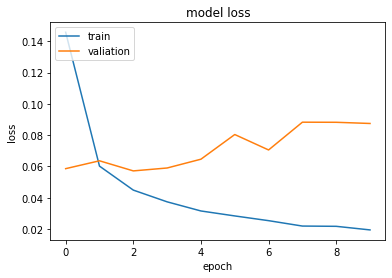

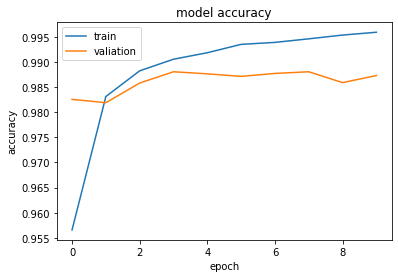

training cases=48000, validation cases=12000, possible outcomes=10
accuracy=0.99%, balanced_accuracy=0.99%, loss=0.082
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1200
           1       0.99      0.99      0.99      1200
           2       0.99      1.00      0.99      1200
           3       0.99      0.98      0.99      1200
           4       0.99      0.99      0.99      1200
           5       1.00      0.99      0.99      1200
           6       0.97      0.98      0.98      1200
           7       0.98      0.98      0.98      1200
           8       1.00      0.99      0.99      1200
           9       0.99      0.98      0.98      1200

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [34]:
# Validate
model.summary()
val_loss, val_accuracy = model.evaluate(X_val2, y_val2, batch_size=64, verbose=1)
print(f'validation loss={val_loss}, validation accuracy={val_accuracy}')
plot_model_history('loss')
plot_model_history('accuracy')
model_performance(model, X_raw2, X_val2, y_val2)

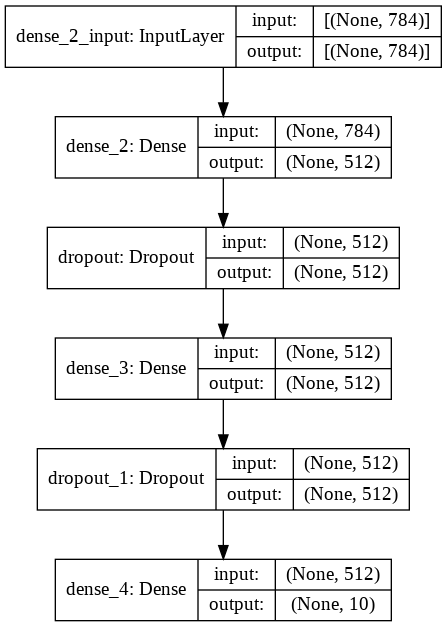

In [35]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [36]:
y_predicted = model.predict(X_val2)
y_grand_truth = y_val2
y_predicted = y_predicted.argmax(axis=1)
y_grand_truth = y_grand_truth.argmax(axis=1)

cm = confusion_matrix(y_grand_truth, y_predicted)
cm

array([[1177,   11,    6,    0,    0,    0,    0,    0,    2,    4],
       [  11, 1188,    1,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1199,    0,    0,    0,    0,    0,    1,    0],
       [   4,    0,    1, 1182,    1,    2,    2,    7,    0,    1],
       [   0,    0,    0,    4, 1189,    3,    0,    0,    1,    3],
       [   0,    0,    3,    2,    6, 1189,    0,    0,    0,    0],
       [   0,    0,    2,    1,    0,    0, 1180,   12,    0,    5],
       [   1,    0,    0,   10,    0,    0,   16, 1173,    0,    0],
       [   2,    3,    1,    0,    0,    0,    0,    0, 1190,    4],
       [   1,    0,    0,    0,    2,    0,   16,    0,    0, 1181]])

In [37]:
trainaccuracy= accuracy_score(y_grand_truth, y_predicted)
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

0.9873333333333333

Validation Data Accuracy:  98.73%


In [38]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_grand_truth, y_predicted))

print ("Confusion matrix")
print(confusion_matrix(y_grand_truth, y_predicted))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1200
           1       0.99      0.99      0.99      1200
           2       0.99      1.00      0.99      1200
           3       0.99      0.98      0.99      1200
           4       0.99      0.99      0.99      1200
           5       1.00      0.99      0.99      1200
           6       0.97      0.98      0.98      1200
           7       0.98      0.98      0.98      1200
           8       1.00      0.99      0.99      1200
           9       0.99      0.98      0.98      1200

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

Confusion matrix
[[1177   11    6    0    0    0    0    0    2    4]
 [  11 1188    1    0    0    0    0    0    0    0]
 [   0    0 1199    0    0    0    0    0    1    0]
 [   4    0    1 1182    1    2    2  

In [ ]:
# if os.path.exists('./submission.csv'):
#   os.remove('./submission.csv')
# else:
#   print("The file does not exist")

In [ ]:
# # format predictions to dataframe and output submission file
# y_test_predicted = model.predict(X_test)
# y_test_predicted = y_test_predicted.argmax(axis=1)

# predictions = pd.DataFrame({'id': test_ids,
#                                  'label': y_test_predicted})

# print(predictions[10:])
# predictions.to_csv('./submission.csv',
#                          header=['id', 'label'],
#                          index=False)

## Submission Score: 0.9432

## Simple CNN

In [11]:
# define model
ml_model = cnn

X_raw2, X_val2, X_test2 = reshape(X_raw, ml_model.__name__), reshape(X_val, ml_model.__name__), reshape(X_test, ml_model.__name__)
y_raw2, y_val2 = one_hot(y_raw), one_hot(y_val)

In [12]:
X_raw2.shape, y_raw2.shape, X_val2.shape, y_val2.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

In [39]:
start=datetime.now()

# Model
model = ml_model(X_raw2, y_raw2)
history = model.fit(X_raw2, y_raw2, validation_data=(X_val2, y_val2), batch_size=64, epochs=10)

end=datetime.now()
print(f'\nCNN Fitting - Start Time: {start}')
print(f'CNN Fitting - End Time: {end}')
print(f'CNN - Time to Fit: {end-start}')

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.1473 - accuracy: 0.9563 - val_loss: 0.0716 - val_accuracy: 0.9803
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0622 - accuracy: 0.9821 - val_loss: 0.0508 - val_accuracy: 0.9863
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0448 - accuracy: 0.9884 - val_loss: 0.0642 - val_accuracy: 0.9852
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0364 - accuracy: 0.9906 - val_loss: 0.0617 - val_accuracy: 0.9871
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0299 - accuracy: 0.9924 - val_loss: 0.0710 - val_accuracy: 0.9858
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0271 - accuracy: 0.9936 - val_loss: 0.0668 - val_accuracy: 0.9881
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0257 - accuracy: 0.9945 - val_loss: 0.0961 - val_accuracy: 0.9835
Epoch 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0

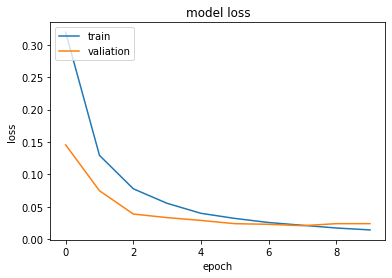

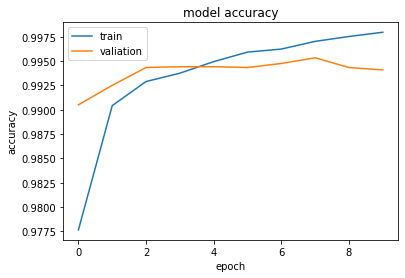

training cases=48000, validation cases=12000, possible outcomes=10
accuracy=0.99%, balanced_accuracy=0.99%, loss=0.024
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1200
           1       0.99      1.00      0.99      1200
           2       1.00      1.00      1.00      1200
           3       1.00      0.98      0.99      1200
           4       1.00      1.00      1.00      1200
           5       1.00      0.99      1.00      1200
           6       0.99      0.99      0.99      1200
           7       0.98      0.99      0.98      1200
           8       1.00      1.00      1.00      1200
           9       1.00      0.99      1.00      1200

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [14]:
# Validate
model.summary()
val_loss, val_accuracy = model.evaluate(X_val2, y_val2, batch_size=64, verbose=1)
print(f'validation loss={val_loss}, validation accuracy={val_accuracy}')
plot_model_history('loss')
plot_model_history('accuracy')
model_performance(model, X_raw2, X_val2, y_val2)

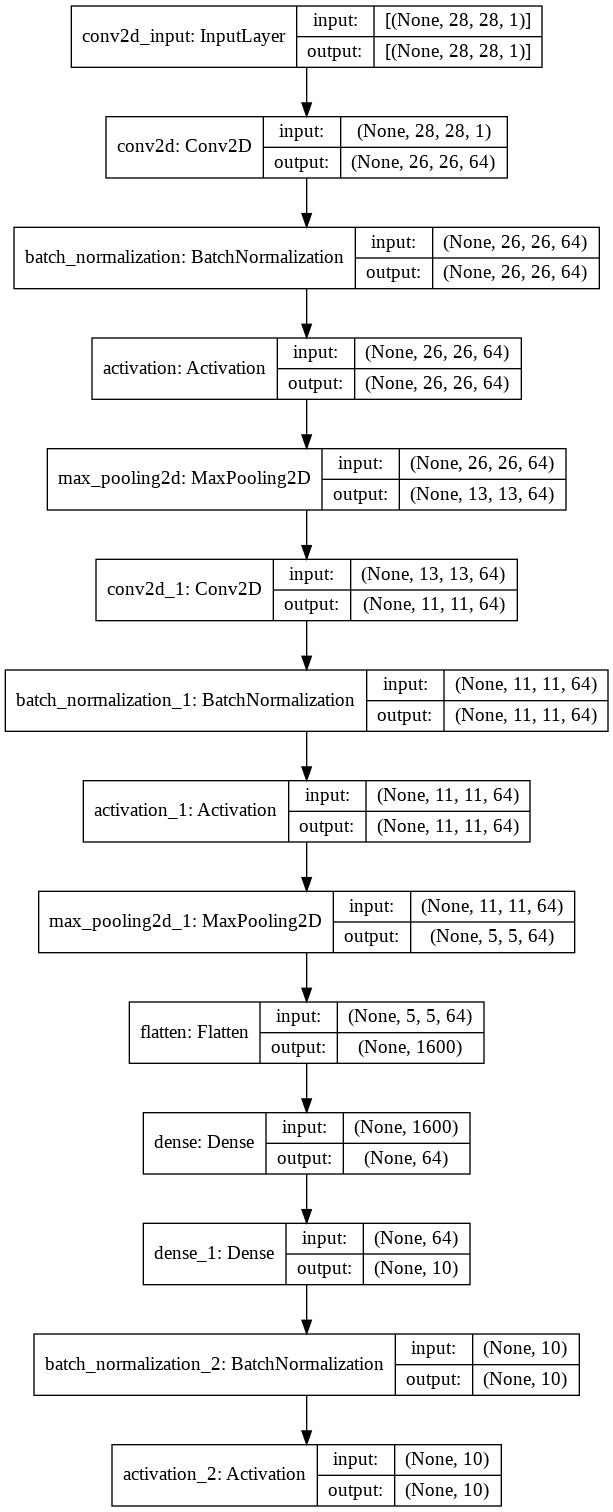

In [15]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [22]:
y_predicted = model.predict(X_val2)
y_grand_truth = y_val2
y_predicted = y_predicted.argmax(axis=1)
y_grand_truth = y_grand_truth.argmax(axis=1)

cm = confusion_matrix(y_grand_truth, y_predicted)
cm

array([[1187,   12,    0,    0,    0,    0,    0,    0,    1,    0],
       [   1, 1199,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1200,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0, 1179,    0,    0,    2,   18,    0,    0],
       [   0,    0,    0,    0, 1199,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    5, 1195,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1189,    9,    0,    2],
       [   1,    0,    0,    1,    0,    0,    8, 1190,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1200,    0],
       [   0,    0,    0,    0,    0,    0,    9,    0,    0, 1191]])

In [23]:
trainaccuracy= accuracy_score(y_grand_truth, y_predicted)
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

0.9940833333333333

Validation Data Accuracy:  99.41%


In [24]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_grand_truth, y_predicted))

print ("Confusion matrix")
print(confusion_matrix(y_grand_truth, y_predicted))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1200
           1       0.99      1.00      0.99      1200
           2       1.00      1.00      1.00      1200
           3       1.00      0.98      0.99      1200
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1200
           6       0.98      0.99      0.99      1200
           7       0.98      0.99      0.98      1200
           8       1.00      1.00      1.00      1200
           9       1.00      0.99      0.99      1200

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

Confusion matrix
[[1187   12    0    0    0    0    0    0    1    0]
 [   1 1199    0    0    0    0    0    0    0    0]
 [   0    0 1200    0    0    0    0    0    0    0]
 [   0    1    0 1179    0    0    2  

In [ ]:
# if os.path.exists('./submission.csv'):
#   os.remove('./submission.csv')
# else:
#   print("The file does not exist")

In [ ]:
# # format predictions to dataframe and output submission file
# y_test_predicted = model.predict(X_test)
# y_test_predicted = y_test_predicted.argmax(axis=1)

# predictions = pd.DataFrame({'id': test_ids,
#                                  'label': y_test_predicted})

# print(predictions[10:])
# predictions.to_csv('./submission.csv',
#                          header=['id', 'label'],
#                          index=False)

## Submission Score: 0.9636

# **MLP with more layers and nodes**

In [25]:

def build_keras_base(hidden_layers = [64, 64, 64], dropout_rate = 0, 
                     l2_penalty = 0.1, optimizer = 'adam',
                     n_input = 100, n_class = 2):
    """
    Keras Multi-layer neural network. Fixed parameters include: 
    1. activation function (PRelu)
    2. always uses batch normalization after the activation
    3. use adam as the optimizer
    
    Parameters
    ----------
    Tunable parameters are (commonly tuned)
    
    hidden_layers: list
        the number of hidden layers, and the size of each hidden layer
    
    dropout_rate: float 0 ~ 1
        if bigger than 0, there will be a dropout layer
    
    l2_penalty: float
        or so called l2 regularization
    
    optimizer: string or keras optimizer
        method to train the network
    
    Returns
    -------
    model : 
        a keras model

    Reference
    ---------
    https://keras.io/scikit-learn-api/
    """   
    model = Sequential()   
    for index, layers in enumerate(hidden_layers):       
        if not index:
            # specify the input_dim to be the number of features for the first layer
            model.add(Dense(layers, input_dim = n_input, kernel_regularizer = l2(l2_penalty)))
        else:
            model.add(Dense(layers, kernel_regularizer = l2(l2_penalty)))
        
        # insert BatchNorm layer immediately after fully connected layers
        # and before activation layer
        model.add(BatchNormalization())
        model.add(PReLU())        
        if dropout_rate:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(n_class))
    model.add(Activation('softmax'))
    
    # the loss for binary and muti-class classification is different 
    # loss = 'binary_crossentropy'
    # if n_class > 2:
    #     loss = 'categorical_crossentropy'
    
    # optimizer = RMSprop(learning_rate=0.002,###########optimizer = RMSprop(learning_rate=0.0025,###########
    #       rho=0.9,
    #       momentum=0.1,
    #       epsilon=1e-07,
    #       centered=True,
    #       name='RMSprop')

    model.compile(loss = keras.losses.categorical_crossentropy,  # 'sparse_categorical_crossentropy' doesn't require oh
                  optimizer='rmsprop', metrics = ['accuracy'])   
    return model


In [64]:
class FixedRandomizedSearchCV(RandomizedSearchCV):
    """ resolved TypeError: __init__() got an unexpected keyword argument 'fit_params'
    """

    def __init__(self, estimator, param_distributions, optimizer_kwargs=None,
                 n_iter=50, scoring=None, fit_params=None, n_jobs=1,
                 n_points=1, refit=True, cv=None, verbose=0,
                 pre_dispatch='2*n_jobs', random_state=None,
                 error_score='raise', return_train_score=False):

        # Bug fix: Added this line
        self.fit_params = fit_params

        self.param_distributions = param_distributions
        self.n_iter = n_iter
        self.n_points = n_points
        self.random_state = random_state
        self.optimizer_kwargs = optimizer_kwargs

        # Removed the passing of fit_params to the parent class.
        super(RandomizedSearchCV, self).__init__(
            estimator=estimator, scoring=scoring, n_jobs=n_jobs,
            refit=refit, cv=cv, verbose=verbose, pre_dispatch=pre_dispatch,
            error_score=error_score, return_train_score=return_train_score)


In [26]:
# the labels have already been one-hot encoded
n_input = X_raw.shape[1]
n_class = 10 # y_raw2.shape[1]
print('feature num: ', n_input)
print('class num: ', n_class)

feature num:  784
class num:  10


In [69]:
# pass in fixed parameters n_input and n_class
model_keras = KerasClassifier(build_fn = build_keras_base,n_input = n_input,n_class = n_class)

# specify other extra parameters pass to the .fit
# number of epochs is set to a large number, we'll
# let early stopping terminate the training process
early_stop = EarlyStopping(
    monitor = 'val_loss', min_delta = 0.1, patience = 5, verbose = 0)

callbacks = [early_stop]
keras_fit_params = {   
    'callbacks': callbacks,
    'epochs': 200,
    'batch_size': 2048,
    'validation_data': (X_val, y_val),
    'verbose': 0
}

# random search's parameter:
# specify the options and store them inside the dictionary
# batch size and training method can also be hyperparameters, 
# but it is fixed
dropout_rate_opts  = [0] #[0, 0.2, 0.5] #
hidden_layers_opts =[[256,256]]
                      #[[256,256],[512,512],[256],[512]]
                      #[[64,64],[256,256],[512,512],[64, 64, 64, 64],[512,512,512],[32, 32, 32, 32, 32],[64, 64, 64], [32, 32, 32], [100, 100, 100]] 
                      # [[256,256],[512,512],[64,64],[28,28],[32,32],[64,64,64],[512,512,512],[64, 64, 64, 64], [32, 32, 32, 32, 32], [100, 100, 100],[16,16,16,16,16,16],[64, 64, 64, 64,64,64,64,64,64,64]]
l2_penalty_opts =[.01] # [0.01, 0.1, 0.5] # 
keras_param_options = {
    'hidden_layers': hidden_layers_opts,
    'dropout_rate': dropout_rate_opts,  
    'l2_penalty': l2_penalty_opts
}


In [70]:
start=datetime.now()

# `verbose` 2 will print the class info for every cross validation, 
# kind of too much
rs_keras = FixedRandomizedSearchCV( 
    model_keras, 
    param_distributions = keras_param_options,
    fit_params = keras_fit_params,
    scoring = 'accuracy',
    n_iter = 3, 
    cv = 3,
    n_jobs = -1,
    verbose = 1)

rs_keras.fit(X_raw, y_raw)

# rs_keras = GridSearchCV( 
#     model_keras, 
#     param_grid = keras_param_options,
#     #fit_params = keras_fit_params,
#     scoring = 'accuracy',
#     cv = 3,
#     n_jobs = -1,
#     verbose = 1)
#
# rs_keras.fit(X_raw, y_raw,epochs=40, batch_size=1024,
#                               steps_per_epoch=(len(X_raw)//1024),
#                               validation_data=(X_val, y_val),
#                               validation_steps=50,
#                               callbacks=[early_stop],
#                               verbose=2)

print('Best score obtained: {0}'.format(rs_keras.best_score_))
print('Parameters:')
for param, value in rs_keras.best_params_.items():
    print('\t{}: {}'.format(param, value))



end=datetime.now()
print(f'\nMLP with more layers and nodes Fitting - Start Time: {start}')
print(f'MLP with more layers and nodes - End Time: {end}')
print(f'MLP with more layers and nodes - Time to Fit: {end-start}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.5s finished


1500/1500 [==============================] - 10s 6ms/step - loss: 0.7945 - accuracy: 0.9356


FixedRandomizedSearchCV(cv=3, error_score='raise',
                        estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7e247baf10>,
                        fit_params={'batch_size': 2048,
                                    'callbacks': [<keras.callbacks.EarlyStopping object at 0x7f7e247bac10>],
                                    'epochs': 200,
                                    'validation_data': (       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0...
59900    0
3606     6
54879    9
58675    5
        ..
15637    7
16875    5
18669    9
14432    2
28140    0
Name: label, Length: 12000, dtype: int64),
                                    'verbose': 0},
                        n_iter=3, n_jobs=-1, n_points=1, optimizer_kwargs=None,
                        param_distributions={'dropout_rate': [0],
                          

Best score obtained: 0.9563333333333333
Parameters:
	l2_penalty: 0.01
	hidden_layers: [256, 256]
	dropout_rate: 0

MLP with more layers and nodes Fitting - Start Time: 2021-11-04 02:44:34.923311
MLP with more layers and nodes - End Time: 2021-11-04 02:45:12.429819
MLP with more layers and nodes - Time to Fit: 0:00:37.506508


In [71]:
 rs_keras.best_score_

0.9563333333333333

In [72]:
y_predicted = rs_keras.predict(X_val)
y_grand_truth = y_val
#y_predicted = y_predicted.argmax(axis=1)
#y_grand_truth = y_grand_truth.argmax(axis=1)

cm = confusion_matrix(y_grand_truth, y_predicted)
cm

array([[1154,   40,    2,    1,    0,    0,    1,    2,    0,    0],
       [  11, 1186,    0,    0,    0,    0,    0,    0,    1,    2],
       [   0,    0, 1192,    0,    5,    1,    0,    0,    0,    2],
       [   9,    1,    0, 1147,    2,   19,   16,    6,    0,    0],
       [   1,    0,    0,   10, 1140,   39,    2,    5,    1,    2],
       [   0,    0,    6,    4,    3, 1186,    0,    1,    0,    0],
       [   1,    2,    0,    8,    0,    0, 1153,   30,    0,    6],
       [   1,    3,    0,   26,    0,    3,  108, 1058,    0,    1],
       [ 131,    5,    8,    8,    3,    4,    0,    3, 1037,    1],
       [   5,    0,    0,    3,    3,    0,   30,   10,    3, 1146]])

In [73]:
trainaccuracy= accuracy_score(y_grand_truth, y_predicted)
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

0.9499166666666666

Validation Data Accuracy:  94.99%


In [74]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_grand_truth, y_predicted))

print ("Confusion matrix")
print(confusion_matrix(y_grand_truth, y_predicted))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1200
           1       0.96      0.99      0.97      1200
           2       0.99      0.99      0.99      1200
           3       0.95      0.96      0.95      1200
           4       0.99      0.95      0.97      1200
           5       0.95      0.99      0.97      1200
           6       0.88      0.96      0.92      1200
           7       0.95      0.88      0.91      1200
           8       1.00      0.86      0.93      1200
           9       0.99      0.95      0.97      1200

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000

Confusion matrix
[[1154   40    2    1    0    0    1    2    0    0]
 [  11 1186    0    0    0    0    0    0    1    2]
 [   0    0 1192    0    5    1    0    0    0    2]
 [   9    1    0 1147    2   19   16  

# **Convolutional Neural Networks**

In [40]:
x_train = X_raw.values.reshape(-1, 28, 28,1)
x_val = X_val.values.reshape(-1, 28, 28,1)
x_test = X_test.values.reshape(-1, 28, 28,1)
y_train = to_categorical(y_raw)
y_val = to_categorical(y_val)

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),##
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [42]:
optimizer = RMSprop(learning_rate=0.002,###########optimizer = RMSprop(learning_rate=0.0025,###########
    rho=0.9,
    momentum=0.1,
    epsilon=1e-07,
    centered=True,
    name='RMSprop')
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [43]:
batch_size = 1024
num_classes = 10
epochs = 40

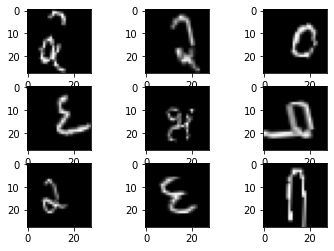

In [44]:
# An observation code for our dataset
datagen_try = ImageDataGenerator(rotation_range=15,
                             width_shift_range = 0.15,
                             height_shift_range = 0.15,
                             shear_range = 0.15,
                             zoom_range = 0.4,)
# fit parameters from data
datagen_try.fit(x_train)
# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen_try.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [45]:
datagen_train = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.4,
                                   horizontal_flip = False)

datagen_val = ImageDataGenerator() 


step_train = x_train.shape[0] // batch_size
step_val = x_val.shape[0] // batch_size

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='loss',    # Quantity to be monitored.
    factor=0.25,       # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=2,        # The number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,         # 0: quiet - 1: update messages.
    mode="auto",       # {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
                       # in the max mode it will be reduced when the quantity monitored has stopped increasing; 
                       # in auto mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.0001,  # threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,        # number of epochs to wait before resuming normal operation after learning rate (lr) has been reduced.
    min_lr=0.00001     # lower bound on the learning rate.
    )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300, restore_best_weights=True)

In [46]:
start=datetime.now()
history = model.fit(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train)//batch_size,
                              epochs=epochs,
                              validation_data=(x_val, y_val),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=2)
end=datetime.now()
print(f'\nCNN Fitting - Start Time: {start}')
print(f'CNN Fitting - End Time: {end}')
print(f'CNN - Time to Fit: {end-start}')

Epoch 1/40
46/46 - 34s - loss: 1.0368 - accuracy: 0.6470 - val_loss: 2.3230 - val_accuracy: 0.1000
Epoch 2/40
46/46 - 25s - loss: 0.2675 - accuracy: 0.9126 - val_loss: 1.0773 - val_accuracy: 0.6758
Epoch 3/40
46/46 - 26s - loss: 0.1727 - accuracy: 0.9440 - val_loss: 1.0587 - val_accuracy: 0.6260
Epoch 4/40
46/46 - 26s - loss: 0.1301 - accuracy: 0.9573 - val_loss: 0.4248 - val_accuracy: 0.9756
Epoch 5/40
46/46 - 26s - loss: 0.1071 - accuracy: 0.9644 - val_loss: 0.1427 - val_accuracy: 0.9946
Epoch 6/40
46/46 - 25s - loss: 0.0987 - accuracy: 0.9669 - val_loss: 0.1796 - val_accuracy: 0.9507
Epoch 7/40
46/46 - 26s - loss: 0.0905 - accuracy: 0.9693 - val_loss: 0.0368 - val_accuracy: 0.9942
Epoch 8/40
46/46 - 26s - loss: 0.0829 - accuracy: 0.9723 - val_loss: 0.0254 - val_accuracy: 0.9958
Epoch 9/40
46/46 - 26s - loss: 0.0755 - accuracy: 0.9745 - val_loss: 0.0236 - val_accuracy: 0.9939
Epoch 10/40
46/46 - 26s - loss: 0.0684 - accuracy: 0.9775 - val_loss: 0.0255 - val_accuracy: 0.9924
Epoch 11/

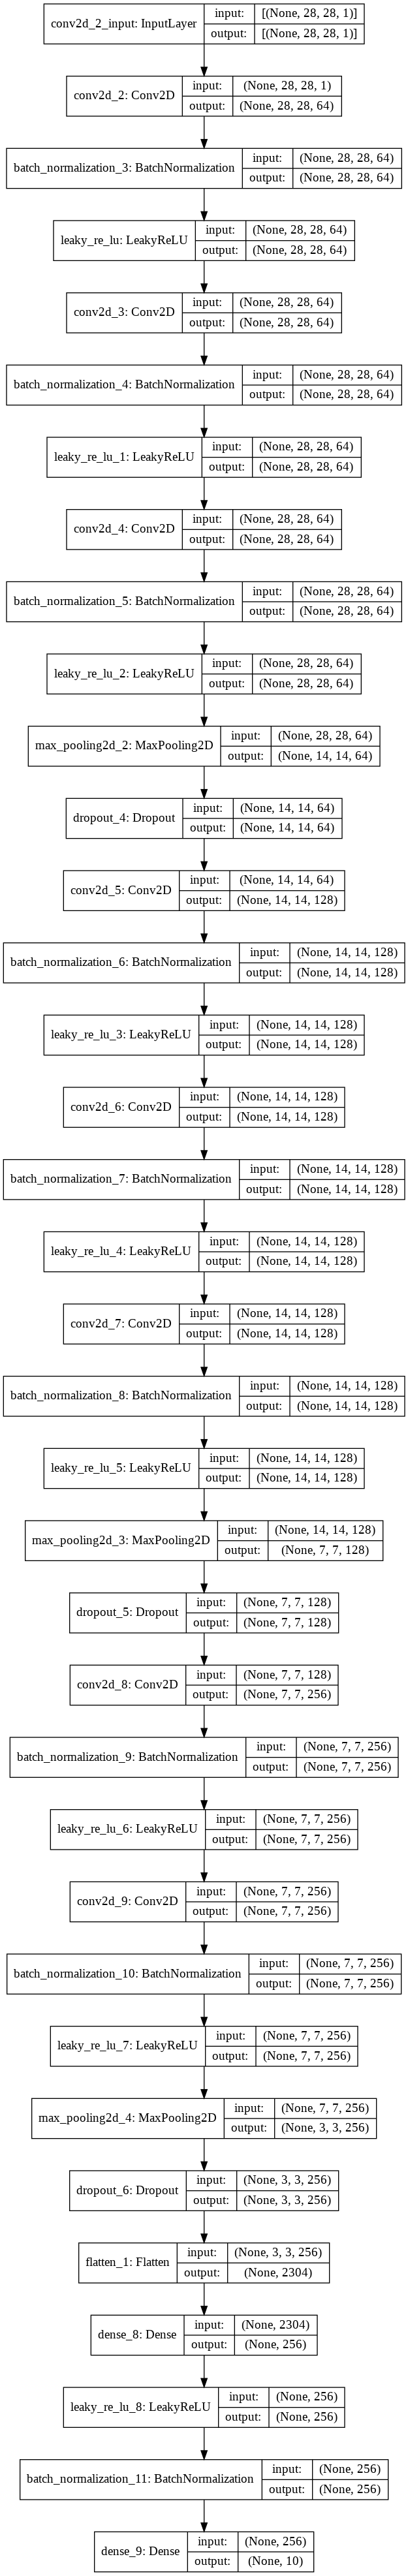

In [47]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

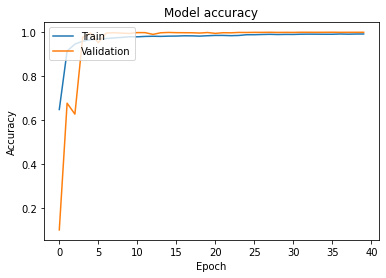

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

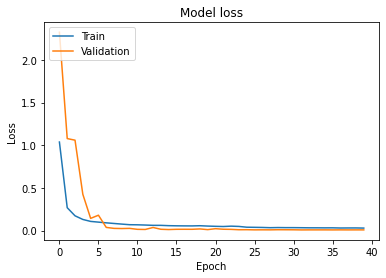

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
model.evaluate(x_val, y_val, verbose=2);

375/375 - 4s - loss: 0.0079 - accuracy: 0.9977


In [50]:
y_predicted = model.predict(x_val)
y_grand_truth = y_val
y_predicted = np.argmax(y_predicted,axis=1)
y_grand_truth = np.argmax(y_grand_truth,axis=1)
cm = confusion_matrix(y_grand_truth, y_predicted)
cm

array([[1195,    3,    1,    0,    0,    0,    0,    0,    1,    0],
       [   5, 1194,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0, 1200,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1199,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0, 1198,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1200,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1198,    2,    0,    0],
       [   0,    0,    1,    2,    0,    0,    3, 1194,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1200,    0],
       [   0,    0,    0,    0,    0,    0,    5,    0,    0, 1195]])

In [51]:
trainaccuracy= accuracy_score(y_grand_truth, y_predicted)
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

print("EVALUATION ON TESTING DATA")
print(classification_report(y_grand_truth, y_predicted))

print ("Confusion matrix")
print(confusion_matrix(y_grand_truth, y_predicted))

0.99775

Validation Data Accuracy:  99.78%
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      0.99      1.00      1200
           2       1.00      1.00      1.00      1200
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1200
           6       0.99      1.00      1.00      1200
           7       1.00      0.99      1.00      1200
           8       1.00      1.00      1.00      1200
           9       1.00      1.00      1.00      1200

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

Confusion matrix
[[1195    3    1    0    0    0    0    0    1    0]
 [   5 1194    0    0    0    0    0    0    1    0]
 [   0    0 1200    0    0    0    0    0    0    0]
 [  

In [ ]:
# if os.path.exists('./submission.csv'):
#   os.remove('./submission.csv')
# else:
#   print("The file does not exist")

In [ ]:
# # format predictions to dataframe and output submission file
# y_test_predicted = model.predict(X_test)
# y_test_predicted = y_test_predicted.argmax(axis=1)

# predictions = pd.DataFrame({'id': test_ids,
#                                  'label': y_test_predicted})

# print(predictions[10:])
# predictions.to_csv('./submission.csv',
#                          header=['id', 'label'],
#                          index=False)

## Submission Score: 0.9636